In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
# path = 'https://raw.githubusercontent.com/pehls/gp27_techchallenge_2/master/data/raw/dados_ibovespa.csv'
df = pd.read_csv('../data/raw/dados_ibovespa.csv')
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df.sort_values('Data', inplace=True)
df.set_index('Data', inplace=True)
df.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2000-12-27,15.186,14.805,15.223,14.805,"239,98M","2,65%"
2000-12-28,15.259,15.188,15.269,15.132,"324,26M","0,48%"
2001-01-02,15.425,15.242,15.621,15.174,"230,63M","1,09%"
2001-01-03,16.599,15.425,16.599,15.251,"381,20M","7,61%"
2001-01-04,16.675,16.597,16.933,16.587,"331,23M","0,46%"


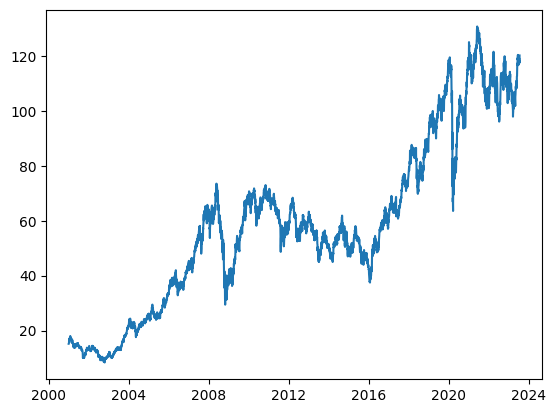

In [4]:
plt.plot(df.index, df['Último'])
plt.show()

In [5]:
df_ts = pd.DataFrame(df['Último'].to_list(), columns=['close'], index=df.index)
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5589 entries, 2000-12-27 to 2023-07-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   5589 non-null   float64
dtypes: float64(1)
memory usage: 87.3 KB


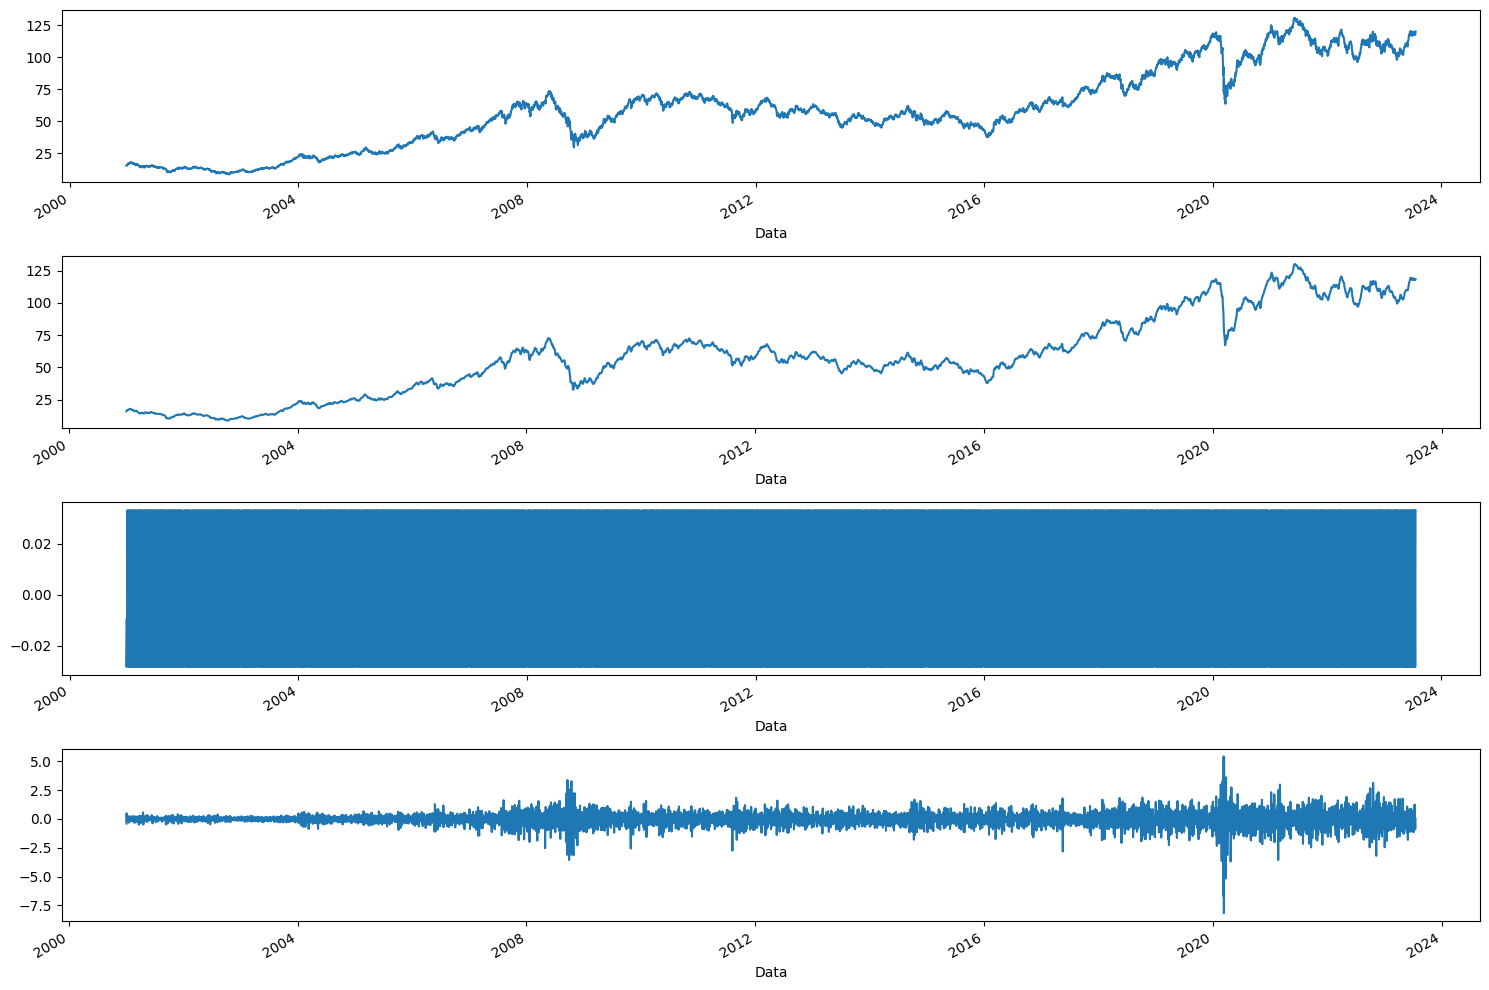

In [6]:
# decompor sazonalidade
decomp = seasonal_decompose(df_ts, period=5)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))
decomp.observed.plot(ax=ax1)
decomp.trend.plot(ax=ax2)
decomp.seasonal.plot(ax=ax3)
decomp.resid.plot(ax=ax4)

plt.tight_layout()

In [7]:
sns.set_style('darkgrid')

In [8]:
def print_adf(serie):
  result = adfuller(serie)

  print('Teste ADF')
  print(f'Teste Estatístico: {result[0]}')
  print(f'P-value: {result[1]}')
  print('Valores críticos:')

  for k, v in result[4].items():
    print(f'\t{k}: {v}')

Teste ADF
Teste Estatístico: -0.8924999370250168
P-value: 0.7904322608539283
Valores críticos:
	1%: -3.4315230881147225
	5%: -2.862058389900819
	10%: -2.5670459375427312


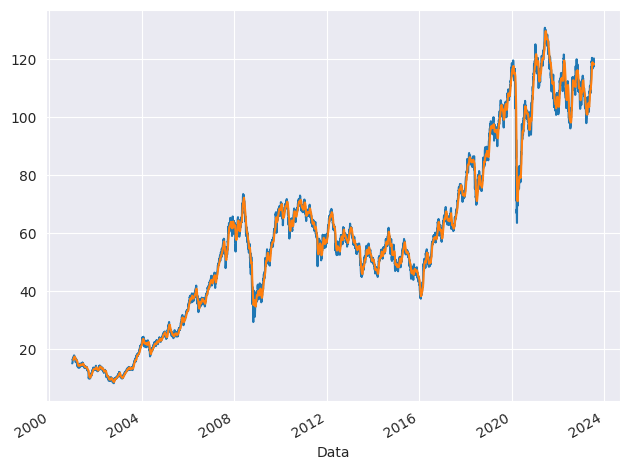

In [9]:
ma = df_ts.rolling(12).mean()

fig, ax = plt.subplots()
df_ts.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False)
plt.tight_layout()

print_adf(df_ts.close.values)

Teste ADF
Teste Estatístico: -1.1201194815782642
P-value: 0.7069821656776504
Valores críticos:
	1%: -3.43152456305293
	5%: -2.8620590415501264
	10%: -2.5670462844360498


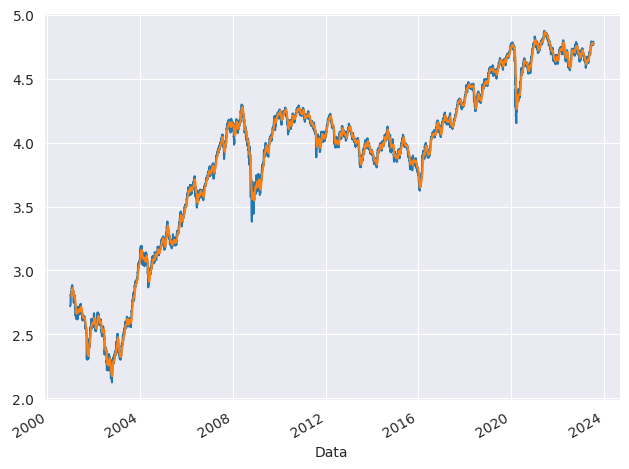

In [10]:
df_log = np.log(df_ts)
ma_log = df_log.rolling(12).mean()

fig, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False)
plt.tight_layout()

print_adf(df_log.close.values)

Teste ADF
Teste Estatístico: -14.350414023922882
P-value: 1.023992094529814e-26
Valores críticos:
	1%: -3.431526888321332
	5%: -2.8620600688871143
	10%: -2.5670468313197894


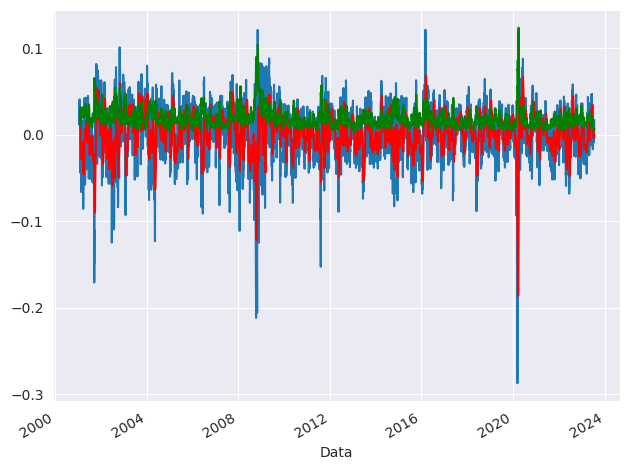

In [11]:
df_s = (df_log - ma_log).dropna()
ma_s = df_s.rolling(12).mean()
std_s = df_s.rolling(12).std()

fig, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std_s.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

print_adf(df_s)

Teste ADF
Teste Estatístico: -20.567372442067356
P-value: 0.0
Valores críticos:
	1%: -3.4315230881147225
	5%: -2.862058389900819
	10%: -2.5670459375427312


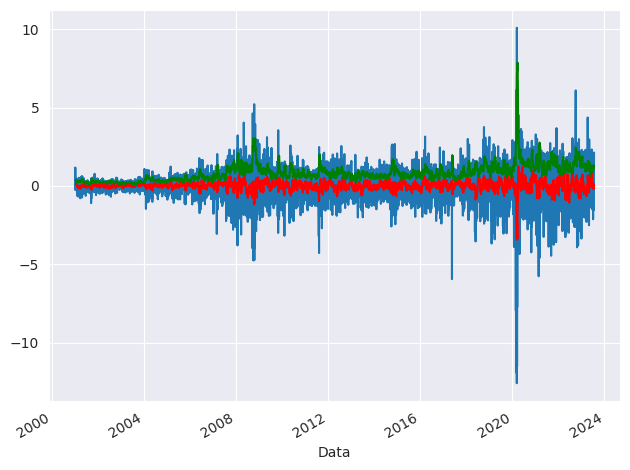

In [12]:
df_diff = df_ts.diff(1)
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

fig, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

print_adf(df_diff.dropna())

Teste ADF
Teste Estatístico: -19.726517446155167
P-value: 0.0
Valores críticos:
	1%: -3.431530287012324
	5%: -2.8620615704761816
	10%: -2.5670476306630508


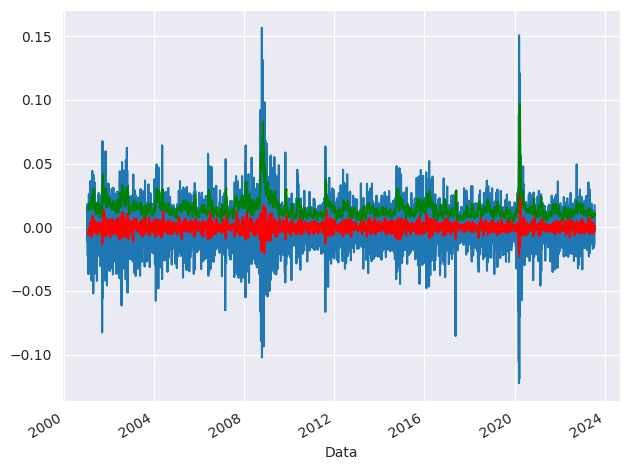

In [13]:
df_diff2 = df_s.diff(1)
ma_diff2 = df_diff2.rolling(12).mean()
std_diff2 = df_diff2.rolling(12).std()

fig, ax = plt.subplots()
df_diff2.plot(ax=ax, legend=False)
ma_diff2.plot(ax=ax, legend=False, color='r')
std_diff2.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

print_adf(df_diff2.dropna())